# Task 1

### Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#### 1) Build colleration matrix and filter results with corellation > 95 or < -.95

In [4]:
df = pd.read_csv('sp500_27270.csv')

# compute correlations
corr = df.corr()
filtered_companies = [company for company in corr['SP500'].keys() if corr['SP500'][company] > 0.95 or corr['SP500'][company] < -0.95]

# select only the most corrleated companies
df_filtered = df.filter(filtered_companies)

print("Total number of companies staisfying the correlation threshold: ", len(filtered_companies))


Total number of companies staisfying the correlation threshold:  72


#### 2) Split dataset to training and testing

In [6]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)

Y_train = list(train['SP500'])
X_train = train.drop(columns=['SP500'])
Y_test = list(test['SP500'])
X_test = test.drop(columns=['SP500'])

X_data = np.array(df_filtered.drop(columns=['SP500']))
Y_data = np.array(df_filtered['SP500'])


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


print("Training chunk length: ", len(train))
print("Testing chunk length: ", len(test))

Training chunk length:  1008
Testing chunk length:  252


#### 3) Choose scoring metric 

In [7]:
# We chose MSE since it's a regression problem
scoring_metric = "neg_mean_squared_error"

#### 4) Train the neural network with both the sgd and adam optimizer

In [8]:
print("\n-------------------------Adam-----------------------\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.1, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.05, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore ADAM with constant learning rate of 0.05: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

print("\nConcluding learning rate: ", 0.05, " is best")




-------------------------Adam-----------------------


Score:  0.007473623564164367
MSE:  99990.00737669984

Score ADAM with constant learning rate of 0.05:  0.9791348150964168
MSE:  2102.0196963605626

Accuracy:  -0.9160408930343524
MSE:  193027.5583370846

Concluding learning rate:  0.05  is best


In [9]:
print("\n-------------------------SGD-----------------------\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.05, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.1, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.2, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

print("\nConcluding SGD is worse in general")



-------------------------SGD-----------------------


Accuracy:  -277.70228396687986
MSE:  28077282.469634168

Accuracy:  -0.007642067501823169
MSE:  101512.806263536

Accuracy:  -13880343.506699048
MSE:  1398346464705.4617

Concluding SGD is worse in general


In [10]:
param_grid = {'learning_rate' : ['adaptive', 'constant'],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.05, 0.1, 0.001],
              # 'hidden_layer_sizes': [(15, 2), (10, 2), (20, 2), (30, 2)]
             }


print("\nUsing grid search to find the best params: \n")
gs = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring_metric)
gs.fit(X_train, Y_train)
print(gs.best_params_)
score = gs.score(X_test, Y_test)
print("Score: ", score)




Using grid search to find the best params: 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-2.1817698925121844e+41, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.1305400815625042e+16, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=sgd, score=-1.3318685230524438e+16, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=adam ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-57523.96054303957, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=adam ....
[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-57434.95636069881, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.05, solver=adam ....
[CV]  learning_rate=adaptive, learning_rate_init=0.05, solver=adam, score=-103850.14943550651, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=sgd ......
[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=sgd, score=-1.0821074699238698e+42, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=sgd ......
[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=sgd, score=-7.979617483440622e+16, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=sgd ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=sgd, score=-9.400644798860757e+16, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=adam .....
[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=adam, score=-60984.036276190694, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=adam .....
[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=adam, score=-149922.301198626, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.1, solver=adam .....
[CV]  learning_rate=adaptive, learning_rate_init=0.1, solver=adam, score=-70906.50066125022, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.001, solver=sgd ....
[CV]  learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-460593266376722.56, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.001, solver=sgd ....
[CV]  learning_rate=adaptive, learning_rate_init=0.001, solver=sgd, score=-175336880878515.34, total=   0

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-89629.40730446095, total=   0.1s
[CV] learning_rate=adaptive, learning_rate_init=0.001, solver=adam ...
[CV]  learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-91623.0011965194, total=   0.0s
[CV] learning_rate=adaptive, learning_rate_init=0.001, solver=adam ...
[CV]  learning_rate=adaptive, learning_rate_init=0.001, solver=adam, score=-95976.41699616199, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-1.1570313588751321e+42, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-1.553394239309497e+21, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.05, solver=sgd .....
[CV]  learning_rate=constant, learning_rate_init=0.05, solver=sgd, score=-1.8300248263278804e+21

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-57434.95636069881, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.05, solver=adam ....
[CV]  learning_rate=constant, learning_rate_init=0.05, solver=adam, score=-103850.14943550651, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.1, solver=sgd ......
[CV]  learning_rate=constant, learning_rate_init=0.1, solver=sgd, score=-4.431599112635735e+46, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.1, solver=sgd ......
[CV]  learning_rate=constant, learning_rate_init=0.1, solver=sgd, score=-1.5889566960657753e+22, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.1, solver=sgd ......
[CV]  learning_rate=constant, learning_rate_init=0.1, solver=sgd, score=-1.8719215490868577e+22, total=   0.0s
[CV] learning_rate=constant, learning_rate_init=0.1, solver=adam .....
[CV]  learning_rate=constant, learning_rate_init=0.1, solver=adam, score=-60984.036276190694, to

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.4s finished


In [11]:
print("Finally using best params\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1,
                     learning_rate_init=0.05, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nAccuracy: ", score)
MSE = mean_squared_error(Y_test, y_predictions)
print("MSE: ", MSE)

Finally using best params


Accuracy:  0.9791348150964168
MSE:  2102.0196963605626


#### 5) Indicate which regularization technique you use to avoid overfitting.

#### 6) Which optimizer performs better in this task? Why?

In [12]:
cros_score = cross_val_score(model, X_test, Y_test, scoring=scoring_metric)
print("Validation score: ", cros_score)

Validation score:  [-97194.52442755 -96937.70727927 -83983.17156416]


In [13]:
cros_score.mean()

-92705.13442366058

Adam is the best optimizer because that's what the GridSearch tells us. overall, it hase lowest training error/loss

#### 7) Plotting predicted vs actual Y values

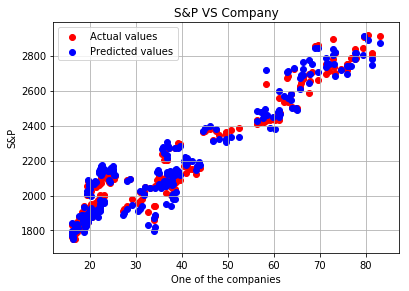

In [62]:
fig = plt.figure()
ax = fig.add_axes([1,0.1,0.8,0.8])
ax.scatter(X_test[:,1], Y_test, c='r', label='Actual values')
ax.scatter(X_test[:,1], y_predictions, c='b', label='Predicted values')

ax.grid()
ax.legend(loc='best')
ax.set_xlabel('One of the companies')
ax.set_ylabel('S&P')
ax.set_title('S&P VS Company')

plt.show()

#### 8) Comment on the points where the prediction and true values mismatch most

# Task 2

#### 1) get most correlated company

In [36]:
max_corr = -100
max_company = ''

for i in corr['SP500'].keys():
    if corr['SP500'][i] > max_corr and i != 'SP500':
        max_corr = corr['SP500'][i]
        max_company = i
        
        
print(max_company)
print(max_corr)

max_company_data = df[max_company]
# print(max_company_data)

APH
0.9883608178608217


#### 2) prepare input and output data set of days using shifting

In [37]:
# print(type(max_company_data))
# print(max_company_data)
# print(max_company_data.shift(-1))
# print(len(max_company_data))

X_data = []
Y_data = []

for iter in range(len(max_company_data) - 9):
    # get first 5 days for input
    X_data.append(list(max_company_data)[:5])
    # get following for days for output
    Y_data.append(list(max_company_data)[5:9])
    # shift data upwards by one step
    max_company_data = max_company_data.shift(-1)
    
print(X_data)
    


[[36.2702, 35.8013, 36.2127, 36.4472, 36.8634], [35.8013, 36.2127, 36.4472, 36.8634, 36.8873], [36.2127, 36.4472, 36.8634, 36.8873, 37.0548], [36.4472, 36.8634, 36.8873, 37.0548, 37.8203], [36.8634, 36.8873, 37.0548, 37.8203, 38.8106], [36.8873, 37.0548, 37.8203, 38.8106, 39.3896], [37.0548, 37.8203, 38.8106, 39.3896, 39.3943], [37.8203, 38.8106, 39.3896, 39.3943, 39.2269], [38.8106, 39.3896, 39.3943, 39.2269, 39.0212], [39.3896, 39.3943, 39.2269, 39.0212, 38.891999999999996], [39.3943, 39.2269, 39.0212, 38.891999999999996, 38.8824], [39.2269, 39.0212, 38.891999999999996, 38.8824, 38.6241], [39.0212, 38.891999999999996, 38.8824, 38.6241, 38.7245], [38.891999999999996, 38.8824, 38.6241, 38.7245, 38.4757], [38.8824, 38.6241, 38.7245, 38.4757, 38.4135], [38.6241, 38.7245, 38.4757, 38.4135, 38.2413], [38.7245, 38.4757, 38.4135, 38.2413, 38.4135], [38.4757, 38.4135, 38.2413, 38.4135, 38.1791], [38.4135, 38.2413, 38.4135, 38.1791, 38.6958], [38.2413, 38.4135, 38.1791, 38.6958, 38.404], [38.4

#### 3) split dataset into test and train

In [39]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)

print("Training chunk length: ", len(X_train))
print("Testing chunk length: ", len(X_test))
# print(X_train)

Training chunk length:  1000
Testing chunk length:  251


#### 4) Create model and it 

In [41]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate='adaptive')

model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### 5) Evaluate model

In [42]:
score = model.score(X_test, y_test)

print("Accuracy: ", score)

Accuracy:  0.994349635826715


# Task 3

## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#### Read dataset and clean

In [2]:
import pandas as pd

reviews = pd.read_json('reviews_digital.json', lines=True)


64706


In [16]:
print(reviews.groupby('overall').count()['asin'])
print()
frames = []

for i in range(1,6):
    frames.append(reviews[(reviews['overall'] == i)][:2500])

balanced_data = pd.concat(frames)

print(len(balanced_data))

overall
1     2791
2     3010
3     6789
4    16536
5    35580
Name: asin, dtype: int64

12500


#### Split data

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

TESTING_PERCENTAGE = 0.2

X_data = np.array(balanced_data['reviewText'])

stop_words = set(stopwords.words('english')) 
X_data_new = []
for text in X_data:
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    X_data_new.append(' '.join(filtered_sentence))
  

Y_data = np.array(balanced_data['overall'])


X_train, X_test, y_train, y_test = train_test_split(X_data_new, Y_data, test_size=TESTING_PERCENTAGE)


#### Calculate tfidf scores

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#You need to define X_train and X_test
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

# print(X_train_transformed)

In [65]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(1024,))

model.fit(X_train_transformed, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(1024,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [66]:
print(model.score(X_test_transformed, y_test))

0.6264


In [ ]:
from sklearn import model_selection
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train_transformed, y_train, cv=3, scoring=scoring, verbose=20)

[CV]  ................................................................


In [70]:
results.mean()
results.std()

0.5972996342489773

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam'],
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(256, 512), (512, 1024)],
    'early_stopping': [True]
}

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=20)

grid_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 
[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.5916041979010495, total=  42.9s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.0s remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.588058805880588, total=  44.4s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.5972388955582233, total=  45.2s
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.2min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.5538230884557721, total= 1.2min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.4min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.5739573957395739, total= 1.4min
[CV] activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s


[CV]  activation=relu, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.595438175270108, total= 1.5min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.3min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.5997001499250375, total=  44.1s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  7.0min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.5958595859585959, total=  44.7s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.7min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(256, 512), solver=adam, score=0.5897358943577431, total=  45.6s
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.5min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.5757121439280359, total= 1.1min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.6min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.5916591659165916, total= 1.1min
[CV] activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 10.8min remaining:    0.0s


[CV]  activation=tanh, early_stopping=True, hidden_layer_sizes=(512, 1024), solver=adam, score=0.5834333733493398, total= 1.2min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 11.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 11.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['adam'], 'activation': ['relu', 'tanh'], 'hidden_layer_sizes': [(256, 512), (512, 1024)], 'early_stopping': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=20)

In [59]:
print(grid_search.best_params_)

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (256, 512), 'solver': 'adam'}
